1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
N=10000

x1=np.random.randn(N)
x2= x1 + np.sqrt(3)*np.random.randn(N)
x3= 2*x1 + x2

X = np.vstack((x1,x2,x3))

COV=np.cov(X) #the covariance matrix

print('The covariant matrix has shape:', COV.shape)

#-------Using LINALG
print("\nUsing LINALG:\n")

λ, Vec = np.linalg.eig(COV) #the eigenvalue and eigenvectors of the covariance matrix

l=np.sort(λ)
V=np.sort(Vec)

print ("The Covariance Matrix [ of shape -->",COV.shape,"]  is :\n",COV)
print ("\nThe eigenvalues λᵢ are: \n",λ) 
print ("\nThe eigenvectors Vᵢ are:\n",V)

#-------Using SVD
print("\nUsing SVD:")

U, spectrum, Vt = la.svd(COV)
 
lsvd=spectrum

Vsvd=U

print ("\nThe eigenvalues λᵢ are: \n",lsvd) 
print ("\nThe eigenvectors Vᵢ are:\n",Vsvd)
print("\nAre the eigenvalues λᵢ and λ_svd the same with both methods? --->", np.allclose(np.sort(λ), np.sort(lsvd) ))
print("Are the eigenvectors Vᵢ and V_svd the same with both methods? --->",np.allclose(np.sort(V), np.sort(Vsvd)))

λ_trace=np.diag(lsvd).trace()

for i in range(X.shape[0]):
    print('The variability of  {}-component is:  ->'.format(i+1),lsvd[i]/ λ_trace, ' <-     sum until here is : ~','%.5f' % (np.sum(lsvd[:i+1])/ λ_trace*100), "%" )

#dataset without the second features -->reduced dimensionality of the dataset
X_rot = np.dot(Vsvd.T, X) #X rotated

Xred= X_rot[:2] # X reducted by only 2 major variability features
Vred= Vsvd[:,:2] # Eigenvectors relative to the X reduced


The covariant matrix has shape: (3, 3)

Using LINALG:

The Covariance Matrix [ of shape --> (3, 3) ]  is :
 [[ 1.03167278  1.02517956  3.08852512]
 [ 1.02517956  3.96691399  6.01727312]
 [ 3.08852512  6.01727312 12.19432336]]

The eigenvalues λᵢ are: 
 [1.60563247e+01 6.23227146e-16 1.13658540e+00]

The eigenvectors Vᵢ are:
 [[-0.81649658 -0.2091766   0.53812497]
 [-0.79431294 -0.44988919 -0.40824829]
 [-0.8682424   0.281937    0.40824829]]

Using SVD:

The eigenvalues λᵢ are: 
 [1.60563247e+01 1.13658540e+00 1.87887839e-15]

The eigenvectors Vᵢ are:
 [[-0.2091766   0.53812497 -0.81649658]
 [-0.44988919 -0.79431294 -0.40824829]
 [-0.8682424   0.281937    0.40824829]]

Are the eigenvalues λᵢ and λ_svd the same with both methods? ---> True
Are the eigenvectors Vᵢ and V_svd the same with both methods? ---> True
The variability of  1-component is:  -> 0.933892203750145  <-     sum until here is : ~ 93.38922 %
The variability of  2-component is:  -> 0.06610779624985472  <-     sum until her

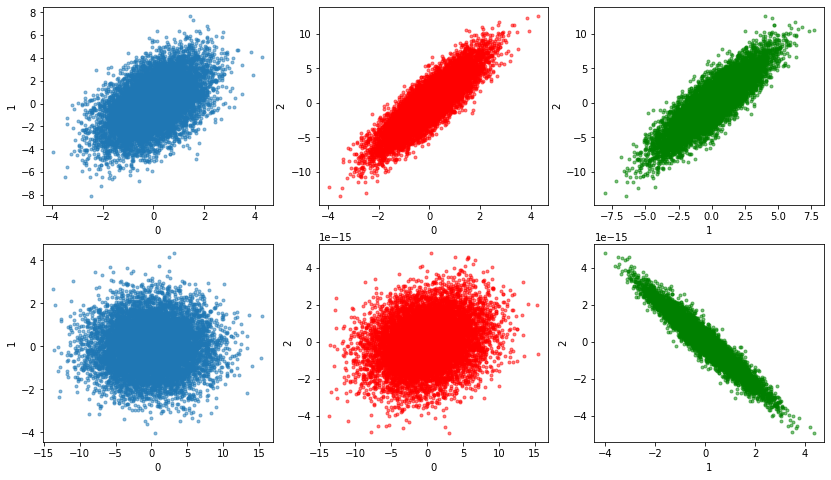

In [3]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(14, 8)

for i in range (2):
    ax[i,0].set_xlabel('0')
    ax[i,0].set_ylabel('1')
    ax[i,1].set_xlabel('0')
    ax[i,1].set_ylabel('2')
    ax[i,2].set_xlabel('1')
    ax[i,2].set_ylabel('2')

ax[0,0].scatter(X[0], X[1], marker='.', alpha=0.5)
ax[0,1].scatter(X[0], X[2], marker='.', alpha=0.5, color='r')
ax[0,2].scatter(X[1], X[2], marker='.', alpha=0.5, color='g')
ax[1,0].scatter(X_rot[0], X_rot[1],marker='.', alpha=0.5)
ax[1,1].scatter(X_rot[0], X_rot[2],marker='.', alpha=0.5, color='r')
ax[1,2].scatter(X_rot[1], X_rot[2],marker='.', alpha=0.5, color='g')


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

The covariant matrix has shape: (3, 3)

Using SVD:

The eigenvalues λᵢ are: [shape(3,)]
 [1.60560444e+01 1.13660328e+00 2.24298373e-04] 


The eigenvectors Vᵢ are: [shape:(3, 3)]
 [[-0.20920245  0.53832321 -0.81635927]
 [-0.4498646  -0.79422597 -0.40844455]
 [-0.86824892  0.28180353  0.40832657]] 

The variability of  1-component is:  -> ~ 0.9338780  <-  sum until here is :~ 93.38780 %
The variability of  2-component is:  -> ~ 0.0661090  <-  sum until here is :~ 99.99870 %
The variability of  3-component is:  -> ~ 0.0000130  <-  sum until here is :~ 100.00000 %


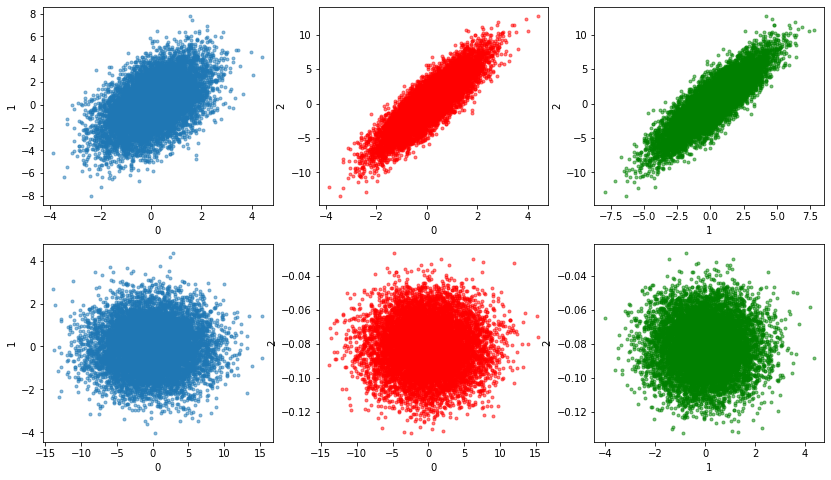

In [4]:
xnoise=1/50*np.random.rand(N,10)

#tmp = np.zeros((X.shape[0] + xnoise.shape[0] , N))
#tmp[:3,:]=X
#tmp[3:,:]=xnoise
#data=tmp

data = X + np.sum(xnoise, axis=1)

COV=np.cov(data) #the covariance matrix
print('The covariant matrix has shape:', COV.shape)

#-------Using SVD
print("\nUsing SVD:")

U, spectrum, Vt = la.svd(COV)

lsvd=spectrum
Vsvd=U

print ("\nThe eigenvalues λᵢ are: [shape{}]\n".format(lsvd.shape) ,lsvd,'\n') 
print ("\nThe eigenvectors Vᵢ are: [shape:{}]\n".format(Vsvd.shape), Vsvd,'\n')

λ_trace=np.diag(lsvd).trace()

for i in range(data.shape[0]):
    print('The variability of  {}-component is:  -> ~'.format(i+1),'%.7f' %(lsvd[i]/ λ_trace), ' <-  sum until here is :~','%.5f' % (np.sum(lsvd[:i+1])/ λ_trace*100), "%" )

#dataset without the second features -->reduced dimensionality of the dataset
X_rot = np.dot(Vsvd.T, data) #X rotated

#Xred= X_rot[:2] # X reducted by only 2 major variability features
#Vred= Vsvd[:,:2] # Eigenvectors relative to the X reduced

X=data

fig, ax = plt.subplots(2, 3)
fig.set_size_inches(14, 8)

for i in range (2):
    ax[i,0].set_xlabel('0')
    ax[i,0].set_ylabel('1')
    ax[i,1].set_xlabel('0')
    ax[i,1].set_ylabel('2')
    ax[i,2].set_xlabel('1')
    ax[i,2].set_ylabel('2')


ax[0,0].scatter(X[0], X[1], marker='.', alpha=0.5)
ax[0,1].scatter(X[0], X[2], marker='.', alpha=0.5, color='r')
ax[0,2].scatter(X[1], X[2], marker='.', alpha=0.5, color='g')
ax[1,0].scatter(X_rot[0], X_rot[1],marker='.', alpha=0.5)
ax[1,1].scatter(X_rot[0], X_rot[2],marker='.', alpha=0.5, color='r')
ax[1,2].scatter(X_rot[1], X_rot[2],marker='.', alpha=0.5, color='g')

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [5]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 